# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении

### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_flats = pd.read_csv('/datasets/real_estate_data.csv', delimiter = '\t')
#data_flats = pd.read_csv('data.csv', delimiter = '\t')
data_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data_flats.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [4]:
data_flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Мы загрузили данные по недвижимости. <br> 
В данных присутствуют пропуски в стобцах: высота потолков, кол-во этажей, жилая площадь, является ли апартаментами, размер кухни, кол-во балконов и т.д. <br> Причины пропусков могут быть разные: отсутствие данной информации у автора объявления (высота потолка, жилая площадь, размер кухни, ближайший аэропорт и т.д.), не заполнили там, где это отсутствует (являются ли апартаментами, наличие балкона). Вызывает вопрос наличие пропусков в столбце days_exposition, по моему мнению этот столбец должен заполняться автоматически.    

Также у показателя first_day_exposition необходимо изменить тип данных.


### Шаг 2. Предобработка данных

Для некоторых пропущенных значений можно предположить логичную замену. <br>
Пропущенные значения is_apartment - скорее всего из за того, что объект не является апартаментом - логично заменить пропущенные значения на False.<br>

In [5]:
data_flats['is_apartment'].value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

In [6]:
data_flats['is_apartment'] = data_flats['is_apartment'].fillna(False)
data_flats['is_apartment'].value_counts(dropna=False)

False    23649
True        50
Name: is_apartment, dtype: int64

Пропуски в в столбце balcony - скорее всего балконов нет - логично заменить эти пропуски на 0. <br>

In [7]:
data_flats['balcony'] = data_flats['balcony'].fillna(0)
data_flats['balcony'].value_counts(dropna=False)

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Для заполнения пропусков в площади кухни и жилой площади найдем их корреляцию с другими параметрами. 

In [8]:
print(data_flats[['kitchen_area', 'living_area', 'rooms', 'last_price', 'total_area']].corr())

              kitchen_area  living_area     rooms  last_price  total_area
kitchen_area      1.000000     0.428674  0.269945    0.519869    0.609121
living_area       0.428674     1.000000  0.845977    0.566492    0.939537
rooms             0.269945     0.845977  1.000000    0.363343    0.758344
last_price        0.519869     0.566492  0.363343    1.000000    0.653675
total_area        0.609121     0.939537  0.758344    0.653675    1.000000


Наибольшая корреляция у этих параметров с общей площадью.

Добавим отношение кухни к общей площади.

In [9]:
data_flats['kitchen_to_total'] = data_flats['kitchen_area'] / data_flats['total_area']

Заполним пропуски в площади кухни, используя найденную зависимость кухни и общей площади. 

In [10]:
data_flats['kitchen_area'].fillna(data_flats['kitchen_to_total'].median()*data_flats['total_area'])

0        25.000000
1        11.000000
2         8.300000
3        27.413793
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696     9.775862
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23699, dtype: float64

Добавим соотношение жилой и общей площади.

In [11]:
data_flats['living_to_total'] = data_flats['living_area'] / data_flats['total_area']

Заполним пропуски в жилой площади, используя найденную зависимость жилой и общей площади.  

In [12]:
data_flats['living_area'].fillna(data_flats['living_to_total'].median()*data_flats['total_area'])

0        51.000000
1        18.600000
2        34.300000
3        90.289724
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.583247
23698    12.300000
Name: living_area, Length: 23699, dtype: float64

Удалим отсутствующие строка floors_total.

In [13]:
data_flats['floors_total'] = data_flats['floors_total'].dropna()

Заполним пропущенные значения ceiling_height исходя из среднего значения ceiling_height в домах разной этажности. 

In [14]:
data_flats['ceiling_height'] = data_flats['ceiling_height'].fillna(data_flats.groupby('floors_total')['ceiling_height'].agg('mean'))

Пропуски в столбцах название населенного пункта, ближайший аэропорт, расстояние до центра, ближайший парк и водоем мы не сможем заполнить, исходя из имеющихся данных.

Столбец first_day_exposition имеет формат object. Изменим его на формат datetime.

In [15]:
data_flats['first_day_exposition'] = pd.to_datetime(data_flats['first_day_exposition'], format = '%Y-%m-%d %H:%M')

Столбцы balcony, floors_total, days_exposition приведем к целочисленным значениям (тип данных int). 

In [16]:
list_to_int = ['floors_total', 'balcony', 'days_exposition']

In [17]:
for column in list_to_int:
    data_flats[column] = data_flats[data_flats[column].notnull()][column].astype('int')

### Шаг 3. Посчитаем и добавим в таблицу параметры.

Добавим в таблицу Цену квадратного метра. 

In [18]:
data_flats['price_per_meter'] = data_flats['last_price'] / data_flats['total_area']

Добавим в таблицу День недели, Месяц и Год публикации объявления. 

In [19]:
data_flats['weekday'] = data_flats['first_day_exposition'].dt.weekday

In [20]:
data_flats['month'] = data_flats['first_day_exposition'].dt.month

In [21]:
data_flats['year'] = data_flats['first_day_exposition'].dt.year

Добавим обозначение Этажа квартиры: первый, последний, другой. 

In [22]:
data_flats['level'] = np.where(data_flats['floor'] == 1, 'первый', 'другой')
data_flats['level'] = np.where(data_flats['floor'] == data_flats['floors_total'], 'последний', data_flats['level'])

Проверим, все ли столбцы были добавлены в таблицу. 

In [23]:
data_flats.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_to_total,living_to_total,price_per_meter,weekday,month,year,level
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16.0,51.0,8,False,...,2.0,755.0,NaN,0.231481,0.472222,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.740000,11.0,18.6,1,False,...,0.0,NaN,81.0,0.272277,0.460396,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,3.006791,5.0,34.3,4,False,...,2.0,574.0,558.0,0.148214,0.612500,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.969474,14.0,NaN,9,False,...,3.0,234.0,424.0,NaN,NaN,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,...,1.0,48.0,121.0,0.410000,0.320000,100000.000000,1,6,2018,другой


### Шаг 4. Проведем исследовательский анализ данных и выполним инструкции.

### 4.1. Изучим параметры: площадь, цена, число комнат, высота потолков.

In [24]:
data_flats[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,14523.000000
mean,60.348651,6.541549e+06,2.070636,2.772374
std,35.654083,1.088701e+07,1.078405,1.264219
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.520000
50%,52.000000,4.650000e+06,2.000000,2.650000
75%,69.900000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Общая площадь квартир от 12 м до 900 м., в среднем 60 м.  
Цена квартир от 1 до 8 млн, в среднем 6 млн.  
Кол-во комнат от 0 (студия?) до 19 (общежитие?).  
Высота потолка от 1 до 100 м. 

Построим гистограммы для этих параметров. 

Попробуем построить их через цикл. 

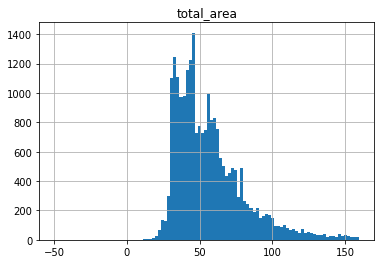

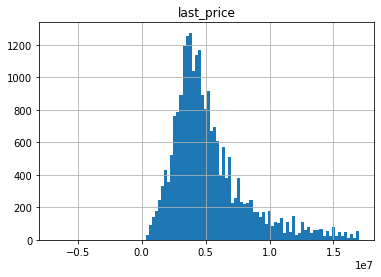

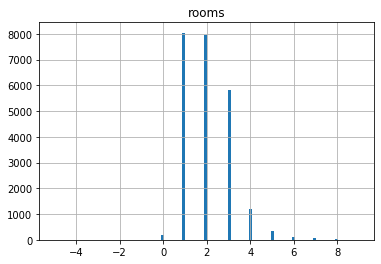

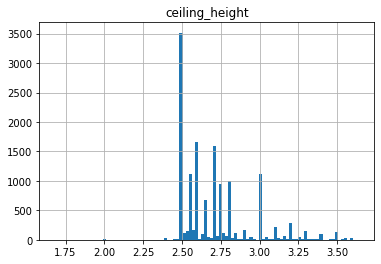

In [25]:
for column in data_flats[['total_area', 'last_price', 'rooms', 'ceiling_height']]:
    Q1 = data_flats[column].quantile(0.25)                 
    Q3 = data_flats[column].quantile(0.75)
    IQR = Q3 - Q1
    data_flats[column].hist(bins=100, range=(Q1-3*IQR, Q3+3*IQR))
    plt.title(column)
    plt.show()
    

Text(0.5, 0, 'm')

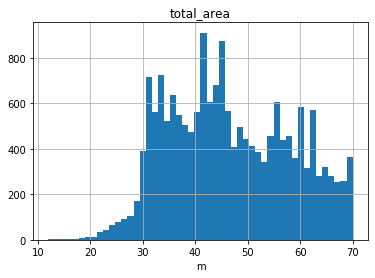

In [26]:
data_flats['total_area'].hist(bins=50, range = (12,70))
plt.title('total_area')
plt.xlabel('m')

Максимальное кол-во квартир площадью около 42 м. 

Text(0.5, 1.0, 'last_price')

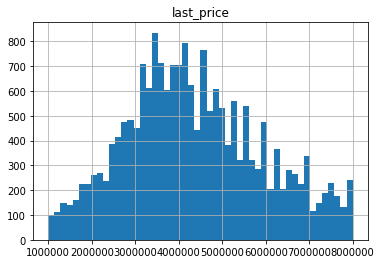

In [27]:
data_flats['last_price'].hist(bins=50, range = (1000000, 8000000))
plt.title('last_price')

Максимальное кол-во квартир стоимостью 3,4 млн. 

Text(0.5, 0, 'number')

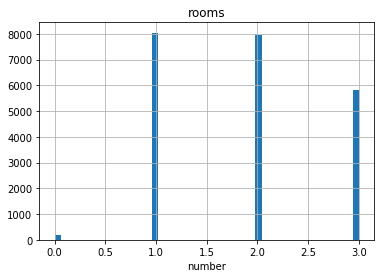

In [28]:
data_flats['rooms'].hist(bins=50, range = (0, 3))
plt.title('rooms')
plt.xlabel('number')

Квартиры в основном 1 и 2-х комнатные. 

Text(0.5, 0, 'm')

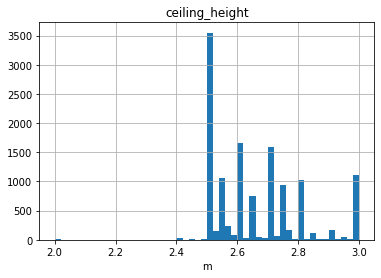

In [29]:
data_flats['ceiling_height'].hist(bins=50, range = (2,3))
plt.title('ceiling_height')
plt.xlabel('m')

Большинство квартир с высотой потолков 2,5 метра. 

### 4.2 Изучим время продажи квартиры.  
Построим гистограмму.

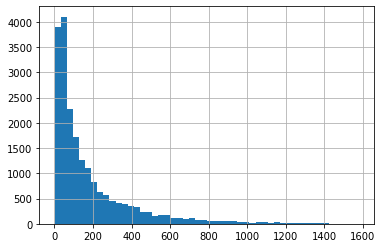

In [30]:
data_flats['days_exposition'].hist(bins=50)

Большинство квартир выставляется около 50 дней. 

Посчитаем среднее и медиану. 

In [31]:
data_flats['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [32]:
print(data_flats['days_exposition'].median())

95.0


Среднее время продажи выше, чем медианное в связи с тем, что некоторые квартиры выставляются свыше 1400 дней (возможно, их не сняли с продажи).  
Минимальное кол-во дней продажи - 1.

### 4.3 Уберем редкие и выбивающиеся значения.

Построим boxplot, чтобы увидеть выбросы. 

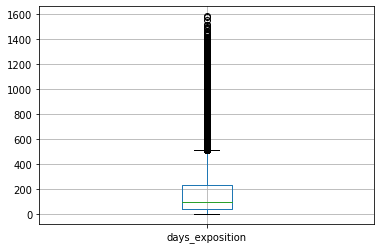

In [33]:
data_flats.boxplot(column='days_exposition')

Ограничим срок продажи 500 днями. 

data_flats.query('days_exposition<500')['days_exposition'].hist(bins=70)

Посмотрим на пики в 45 и 60 дней.

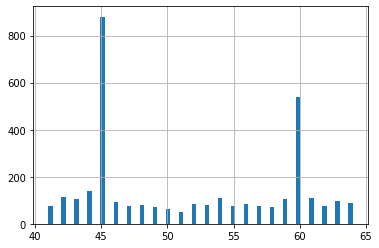

In [34]:
data_flats.query('40<days_exposition<65')['days_exposition'].hist(bins=70)

Возможно, данные пики вызваны тем, что 1 раз в 15 дней проверяется информация, действительно ли еще объявление. Если не действительно, объявление снимается с продажи.

Определим выбросы по каждому из набора данных.

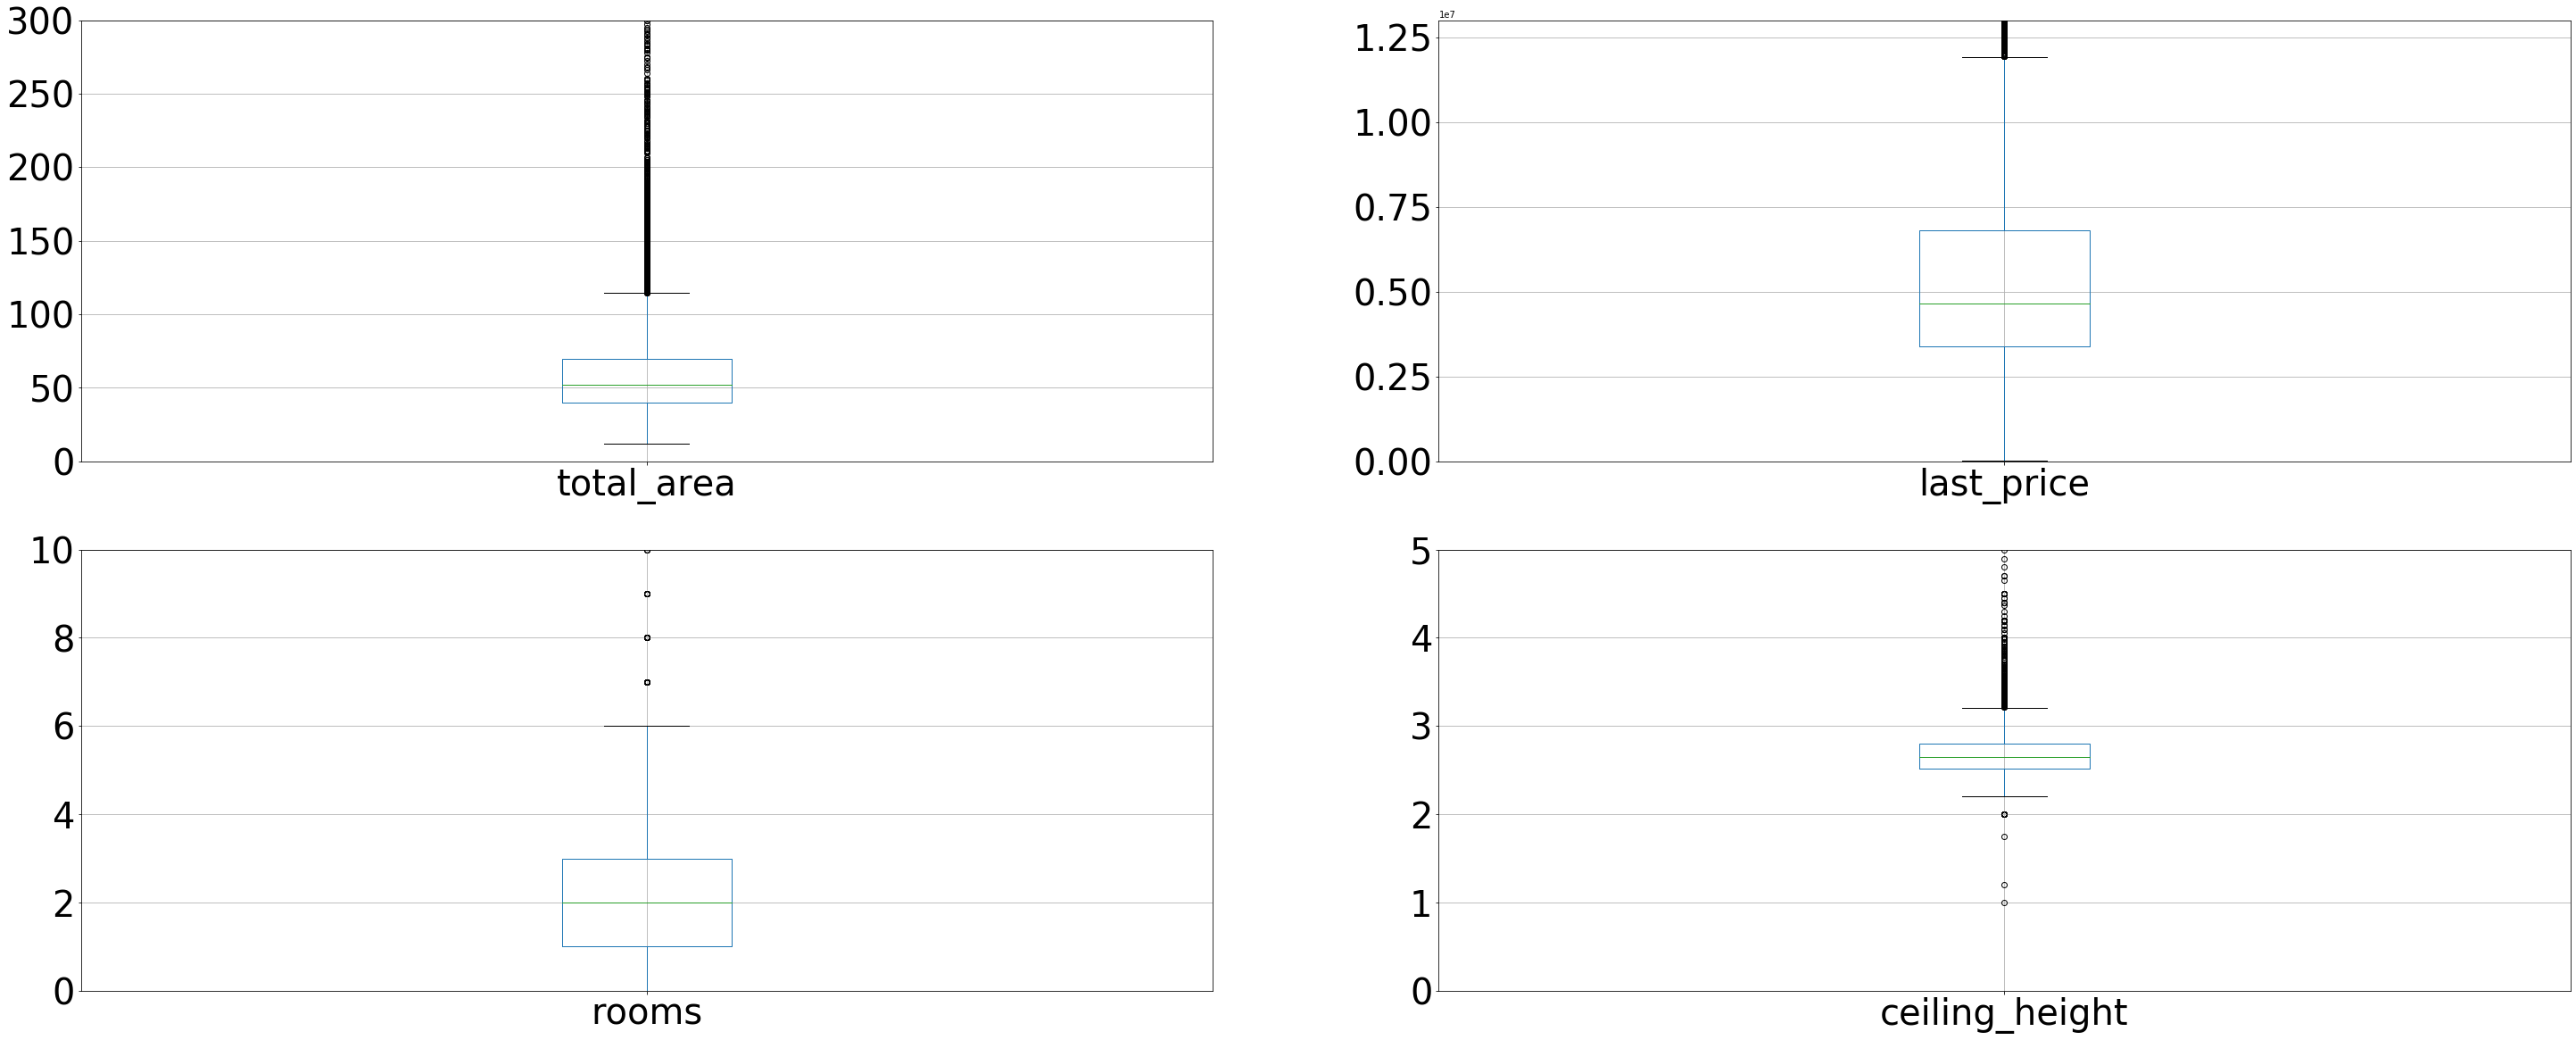

In [35]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,20))
column_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
ylims = [300, 13000000, 10, 5]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data_flats.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Определим границы параметров:
    - total_area - 20-120 м;
    - last_price - 0-12 млн руб.;
    - rooms - 0-6 комнат;
    - ceiling-height - 2.4 - 3.2 м.

Удалим данные выбросы из параметров. 

In [36]:
data_flats['total_area'] = data_flats.query('20<total_area <120')['total_area']

In [37]:
data_flats['last_price'] = data_flats.query('last_price <=12000000')['last_price']

In [38]:
data_flats['rooms'] = data_flats.query('rooms <=6')['rooms']

In [39]:
data_flats['ceiling_height'] = data_flats.query('2.4<ceiling_height <=3.2')['ceiling_height']

Построим гистограммы без учета выбросов.

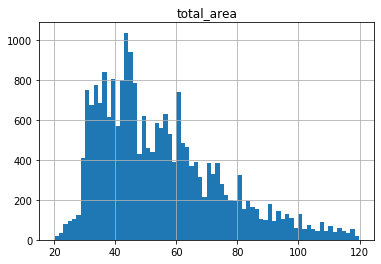

In [40]:
data_flats['total_area'].hist(bins=70)
plt.title('total_area')
plt.show()

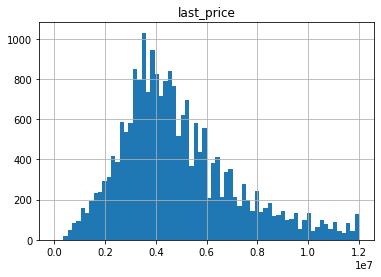

In [41]:
data_flats['last_price'].hist(bins=70) 
plt.title('last_price')
plt.show()

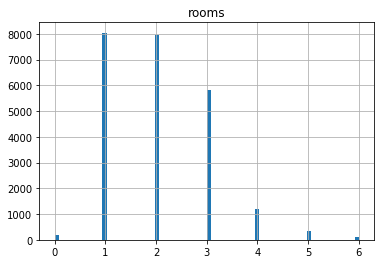

In [42]:
data_flats['rooms'].hist(bins=70) 
plt.title('rooms')
plt.show()

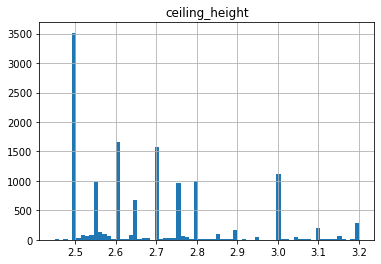

In [43]:
data_flats['ceiling_height'].hist(bins=70) 
plt.title('ceiling_height')
plt.show()

### 4.4 Определим, какие факторы больше всего влияют на стоимость квартиры.  

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра.

In [44]:
corr_matrix = data_flats[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
print(corr_matrix)

                     last_price  total_area     rooms  cityCenters_nearest
last_price             1.000000    0.700877  0.457321            -0.348941
total_area             0.700877    1.000000  0.788589            -0.193081
rooms                  0.457321    0.788589  1.000000            -0.173809
cityCenters_nearest   -0.348941   -0.193081 -0.173809             1.000000


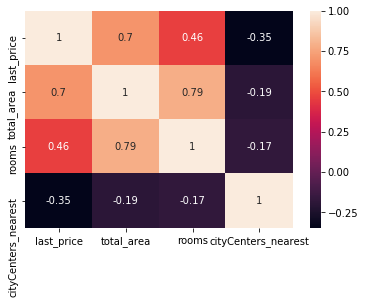

In [45]:
sns.heatmap(corr_matrix, annot=True)

Цена зависит от общей площади (чем больше площадь, тем больше цена).  
Цена зависит от количества комнат (чем больше комнат, тем выше цена).  
Цена зависит от удаленности от центра (чем дальше от центра, тем ниже цена).

Изучим зависимость цены от того, на каком этаже расположена квартира.

In [46]:
print(data_flats.groupby('level')['last_price'].mean().sort_values())

level
первый       4.172757e+06
последний    4.517866e+06
другой       5.072145e+06
Name: last_price, dtype: float64


Квартиры на первых эажах стоят дешевле, на последних - дороже. 

Изучим зависимость от даты размещения: дня недели, месяца и года.

In [47]:
print(data_flats.groupby('weekday')['last_price'].mean().sort_values())

weekday
5    4.757604e+06
6    4.822132e+06
4    4.859565e+06
0    4.875462e+06
3    4.889787e+06
2    4.917294e+06
1    4.935123e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в субботу. Максимальные цены на квартиры, размещенные в пятницу. 

In [48]:
print(data_flats.groupby('month')['last_price'].mean().sort_values())

month
6     4.725797e+06
10    4.836327e+06
1     4.838379e+06
3     4.842743e+06
5     4.857883e+06
2     4.874889e+06
8     4.877172e+06
7     4.883114e+06
11    4.895730e+06
12    4.909508e+06
4     4.976267e+06
9     4.998953e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в октябре. Максимальные цены на квартиры, размещенные в декабре.

In [49]:
print(data_flats.groupby('year')['last_price'].mean().sort_values())

year
2018    4.805091e+06
2017    4.809927e+06
2016    4.838240e+06
2019    5.139235e+06
2015    5.308486e+06
2014    5.919030e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в 2018 году. Максимальные цены на квартиры, размещенные в 2014 году. 

Построим графики зависимости цены от параметров.

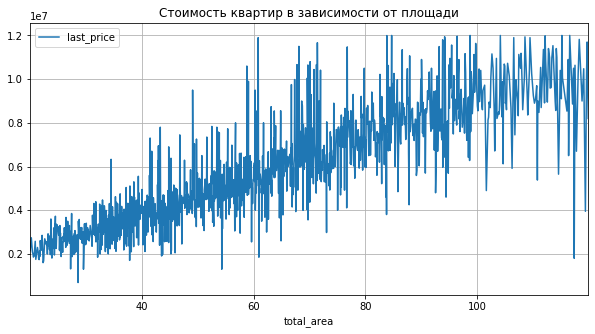

In [50]:
data_flats.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(10,5), title='Стоимость квартир в завиcимости от площади')


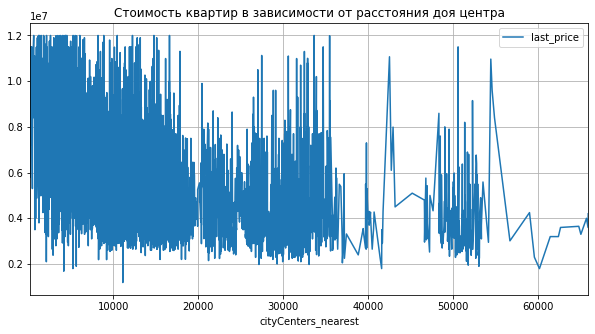

In [51]:

data_flats.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(10,5), title='Стоимость квартир в завиcимости от расстояния доя центра')


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


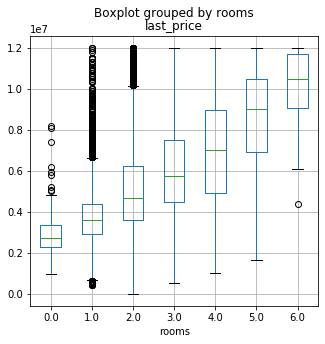

In [52]:
plot = data_flats.boxplot('last_price', by='rooms',figsize=(5,5))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


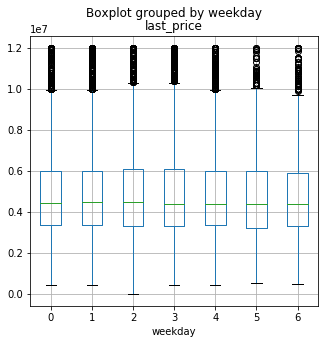

In [53]:
plot = data_flats.boxplot('last_price', by='weekday',figsize=(5,5))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


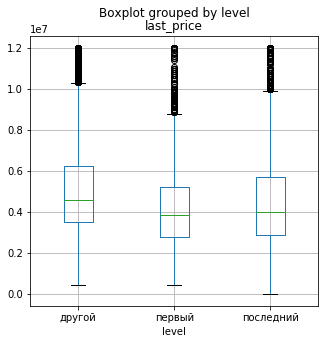

In [54]:
plot = data_flats.boxplot('last_price', by='level',figsize=(5,5))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


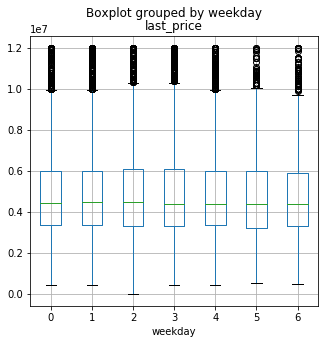

In [55]:
plot = data_flats.boxplot('last_price', by='weekday',figsize=(5,5))


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


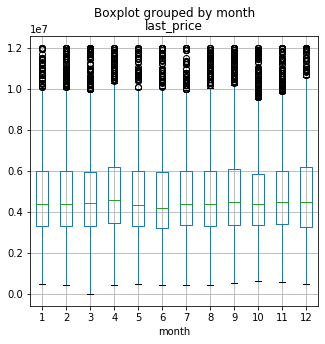

In [56]:
plot = data_flats.boxplot('last_price', by='month',figsize=(5,5))

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


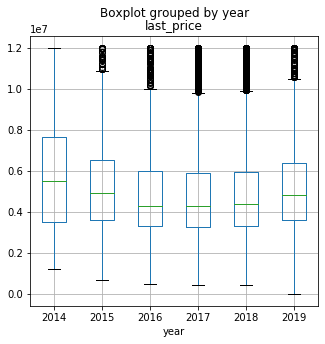

In [57]:
plot = data_flats.boxplot('last_price', by='year',figsize=(5,5))

### 4.5 Выберем 10 населённых пунктов с наибольшим числом объявлений и посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [58]:
data_flats.groupby('locality_name')['price_per_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
    

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.008794
посёлок Мурино,522,85752.189195
посёлок Шушары,440,78677.364217
Всеволожск,398,68654.473986
Пушкин,369,103125.819291
Колпино,338,75424.579098
посёлок Парголово,327,90175.913458
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


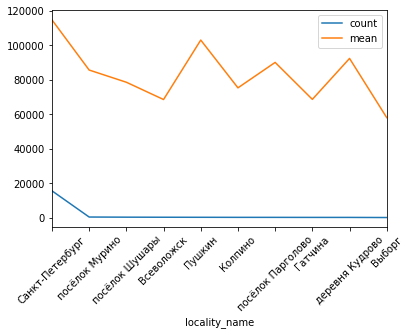

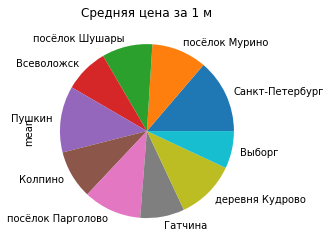

In [59]:
data_flats.groupby('locality_name')['price_per_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10).plot()
plt.xticks(rotation=45)

a = data_flats.groupby('locality_name')['price_per_meter'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)
a.plot(y='mean', kind='pie', legend=False, title='Средняя цена за 1 м')
plt.show()


Топ по количеству объявлений возвглавляет Санкт-Петербург, у него же самая высокая стоимость жилья за 1 м. Самая низкая стоимость жилья среди топ-10 по кол-ву размещенных обьявлений - в Выборге.

### 4.6 Изучим квартиры в Санкт-Петербурге.  
Добавим столбец с расстоянием до центра в км. 

In [60]:
data_flats['cityCenters_nearest_km'] = (data_flats['cityCenters_nearest']/1000).round()

Добавим столбец со средней ценой для каждого километра. 

In [61]:
data_flats['price_per_km'] = data_flats['last_price'] / data_flats['cityCenters_nearest_km']

Построим график зависимости цены от удаленности от центра. 

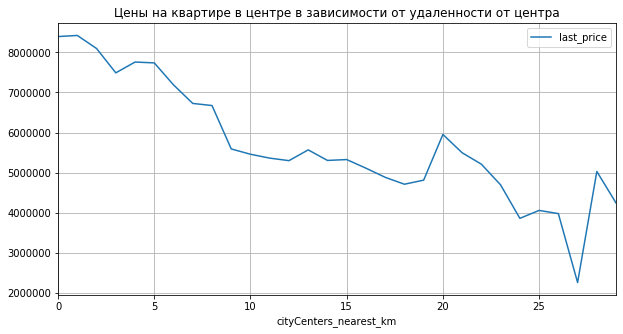

In [62]:
(data_flats.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, figsize=(10,5), title='Цены на квартире в центре в зависимости от удаленности от центра'))
plt.show()

Можно проследить прямую зависимость цены от удаленности от центра. Чем ближе к центру, тем цена выше. График сильно меняется на расстоянии 3 км от центра - это можно принять за центральную зону. 

### 4.7 Проанализируем сегмент квартир в центре Санкт-Петербурга.  
Изучим параметры: площадь, цена, число комнат, высота потолков

In [63]:
sample_center = data_flats.query('cityCenters_nearest_km <=3 and locality_name == "Санкт-Петербург"')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef5614650>]],
      dtype=object)

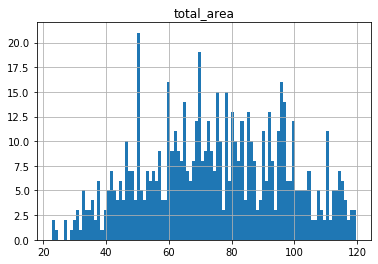

In [64]:
sample_center.hist("total_area", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef73adc10>]],
      dtype=object)

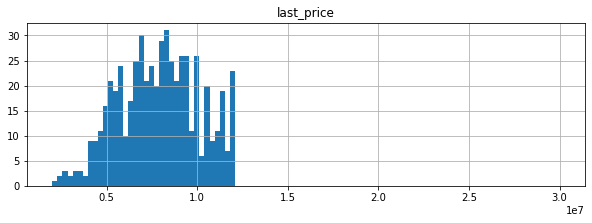

In [65]:
sample_center.hist("last_price", bins=100, range = (2000000, 30000000), figsize=(10,3))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef55dfcd0>]],
      dtype=object)

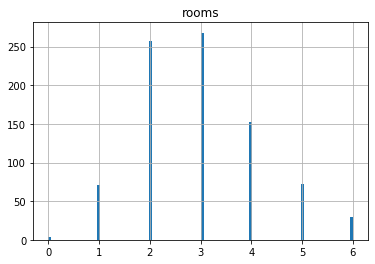

In [66]:
sample_center.hist('rooms', bins=100)

В центре Санкт-Петербурга максимальное кол-во квартир продается с площадью 70-80 м, стоимостью от 8 до 9 млн руб, кол-во комнат - от 2-х до 3-х, потолки 3 м. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ef724c8d0>]],
      dtype=object)

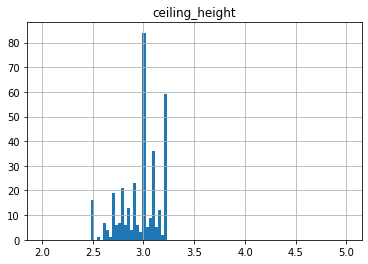

In [67]:
sample_center.hist('ceiling_height', bins=100, range=(2,5))

Изучим факторы, которые влияют на стоимость квартир в центре Санкт-Петербурга (число комнат, удалённость от центра).

In [68]:
sample_center[['last_price', 'rooms', 'cityCenters_nearest', 'first_day_exposition']].corr()

,last_price,rooms,cityCenters_nearest
last_price,1.000000,0.521972,-0.172343
rooms,0.521972,1.000000,-0.072154
cityCenters_nearest,-0.172343,-0.072154,1.000000


Цена зависит от количества комнат (чем больше комнат, тем выше цена). 
Цена зависит от удаленности от центра (чем дальше от центра, тем ниже цена).
Корреляция данных факторов ниже, чем в целом по городу. 

Изучим зависимость цены от того, на каком этаже расположена квартира.

In [69]:
print(sample_center.groupby('level')['last_price'].mean().sort_values())

level
первый       6.666970e+06
последний    8.160371e+06
другой       8.168003e+06
Name: last_price, dtype: float64


Квартиры на первых этажах стоят дешевле, на последних - дороже. По аналогии с квартирами в целом по городу. 

Изучим зависимость от даты размещения: дня недели, месяца и года.

In [70]:
print(sample_center.groupby('weekday')['last_price'].mean().sort_values())

weekday
3    7.458730e+06
5    7.484238e+06
0    7.801281e+06
1    7.935769e+06
4    8.152274e+06
2    8.189714e+06
6    8.208081e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в четверг. Максимальные цены на квартиры, размещенные в пятницу. Это отличается от квартир в целом по городу.

In [71]:
print(sample_center.groupby('month')['last_price'].mean().sort_values())

month
11    7.224902e+06
8     7.343556e+06
1     7.644941e+06
12    7.671190e+06
7     7.695636e+06
5     7.923441e+06
10    7.949721e+06
6     7.964129e+06
4     8.011940e+06
2     8.141471e+06
3     8.282265e+06
9     8.593927e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в мае. Максимальные цены на квартиры, размещенные в апреле. Это отличается от квартир в целом по городу.

In [72]:
print(sample_center.groupby('year')['last_price'].mean().sort_values())

year
2014    7.500000e+06
2017    7.547990e+06
2018    7.870745e+06
2015    7.946412e+06
2019    8.403415e+06
2016    8.466600e+06
Name: last_price, dtype: float64


Минимальные цены на квартиры, размещенные в 2018 году. Максимальные цены на квартиры, размещенные в 2014 году. Это совпадает с трендом по квартирам в целом по городу. 

Построим график зависимости цены в центре города от основных параметров: площади, удаленности от центра, числа комнат. 

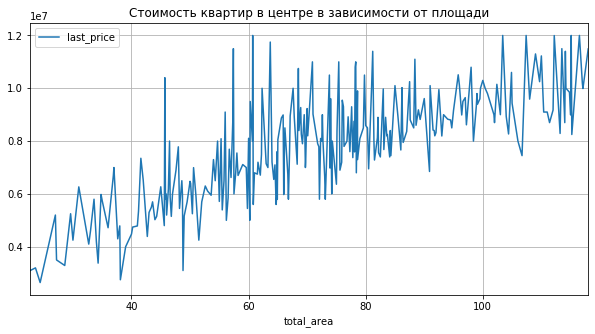

In [73]:
sample_center.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(10,5), title='Стоимость квартир в центре в зависимости от площади')


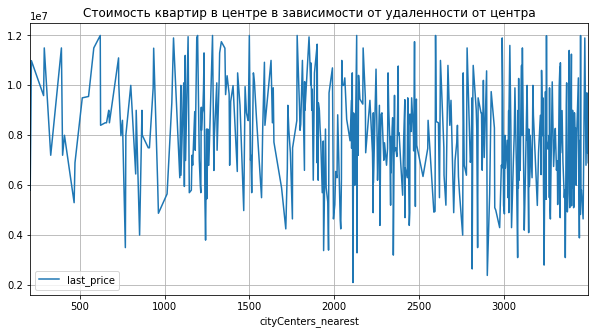

In [74]:
sample_center.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, figsize=(10,5), title='Стоимость квартир в центре в зависимости от удаленности от центра')


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


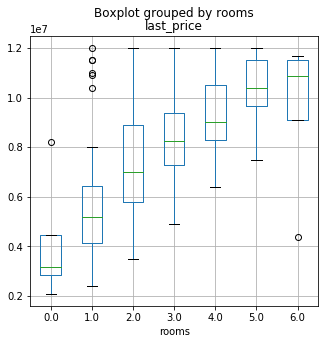

In [75]:
plot = sample_center.boxplot('last_price', by='rooms',figsize=(5,5))

### Шаг 5. Общий вывод

В данном проекте мы проанализировали объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Мы попытались обнаружить параметры для определения рыночной стоимости объектов недвижимости.  
Мы обнаружили пропуски в стобцах: высота потолков, кол-во этажей, жилая площадь, является ли апартаментами, размер кухни, кол-во балконов и т.д. Для некоторых пропущенных значений мы предположили логичную замену.  
Мы изменили формат данных в столбцах: first_day_exposition (на datetime), balcony, floors_total, days_exposition (на int).  
Мы посчитали и добавили в таблицу столбцы: цена квадратного метра; день недели, месяц и год публикации объявления;
этаж квартиры(первый, последний, другой); соотношение жилой и общей площади, а также отношение площади кухни к общей.  
Мы провели исследовательский анализ данных:  
- Изучили параметры: площадь, цена, число комнат, высота потолков;  
- Изучили время продажи квартиры - большинство квартир выставляется около 50 дней;  
- Убрали редкие и выбивающиеся значения;  
- Изучили факторы, влияющие на стоимость квартиры - Цена зависит от общей площади (чем больше площадь, тем больше цена), от количества комнат (чем больше комнат, тем выше цена),от удаленности от центра (чем дальше от центра, тем ниже цена). Квартиры на первых эажах стоят дешевле, на последних - дороже;
- Выбрали 10 населённых пунктов с наибольшим числом объявлений. Посчитали среднюю цену квадратного метра в этих населённых пунктах - самая высокая цена в Санкт-Петербурге, самая низкая - в Выборге;
- Построили график, показывающий, как цена зависит от удалённости от центра Санкт-Петербурга. Определили границу центральной зоны (<=3 км);
- Выделили сегмент квартир в центре. Выделили факторы, которые влияют на стоимость данных квартир - цена зависит от количества комнат (чем больше комнат, тем выше цена),от удаленности от центра (чем дальше от центра, тем ниже цена), квартиры на первых этажах стоят дешевле, на последних - дороже.